## 크로스 밸리데이션

In [6]:
import pandas as pd
df = pd.read_csv("wine_data.csv")

In [7]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
            'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [8]:
# 트레이닝/테스트 데이터 분할

from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [9]:
# 데이터 표준화

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std  = std_scale.transform(X_te)

- 그리드 서치학습의 단계 정리
    - 여러 무수한 하이퍼파라미터 중에 베스트 하이퍼파라미터 뽑아줘 !
    - 어떤 기본 모형에서의 하이퍼파라미터? svm, 로지스틱? 나이즈베이즈? 
    - 어떤 하이퍼파라미터후보에서(내가 생각하는 후보군)? = 파라미터 그리드
    - 크로스밸리데이션할떄 몇개로 나눌거야? & StratifiedKfold 사용해서 비율은 고정 
    - 평가기준은(accuracy, precision, recall 등등)

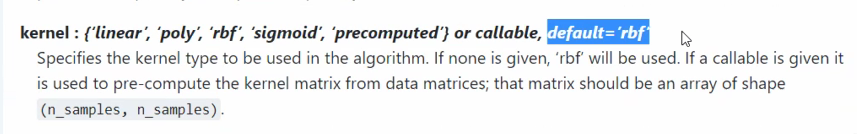

In [10]:
# 그리드 서치 학습

# 1) 라이브러리 불러오기

from sklearn import svm 
from sklearn.model_selection import StratifiedKFold # training과 validation 데이터 뽑을때, 동일 비율로 하기 위해서 사용
from sklearn.model_selection import GridSearchCV # CV (크로스밸리데이션)에서 가장 좋은 결과를 찾기

# 2) 찾고자 하는 파라미터 그리드 입력(찾고자 하는 후보)

param_grid= {'kernel': ('linear', 'rbf'), # kernel 에서 linear or rbf 사용(RBF : 가우시안 RBF 커널)
            'C': [0.5, 1, 10, 100]} # 각 하이퍼 파라미터 중에 가장 좋은 것찾기! 
                                    # 총 8가지 조합 : (2개의 방법 : linear, rbf) * (4개의 하이퍼파라미터 : 0.5,1,10,100) 
    
# 3) k-fold 크로스 밸리데이션 

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
## kfold = 데이터를 3개씩 나눈것이(트레이닝,밸리데이션,테스트) n개 라는 뜻
## shuffle = True , 작업하기 전에 데이터 섞기 (디폴트)
## random_state = 0 : 랜덤으로 뽑을떄 데이터셋이 변경하지 않고 고정시킴 !


# 4) svm 모델 생성

svc = svm.SVC(random_state=0)
## 섞으니까 random_state 해줘야함(어떻게 섞어도 똑같은 데이터셋으로 만들기 위해서 !)
## 여기서는 순정 svc 사용 (하이퍼파라미터값 아무것도 설정 안함)

#svc : 해당하는 모형 svc를 사용할것이고,
#param_grid : 많은 후보중에서 (하이퍼파라미드) 최고 파라미터 후보값들 찾아줄게
#cv=kfold : 크로스밸리데이션은 어떻게 할래? 비율을 유지하면서 크로스밸리데이션 할래, 대부분 유지하는 케이스가 많음!
#scoring(평가기준) = 많은 평가 방법 중, accuracy 로 할래


# 5) 그리드서치

grid_cv = GridSearchCV(svc, param_grid, cv=kfold, scoring='accuracy')

## 기존에 만든 모델 : svc , 찾고자 하는 파라미터 후보 :param_grid, 크로스밸리데이션 대상 : cf=kfold , 평가: accuracy)


# 6) 모델 피팅(학습)
grid_cv.fit(X_tn_std, y_tn)

# 7) 작업한 결과 나옴

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(random_state=0),
             param_grid={'C': [0.5, 1, 10, 100], 'kernel': ('linear', 'rbf')},
             scoring='accuracy')

In [11]:
# 그리드 서치 결과 확인
grid_cv.cv_results_

{'mean_fit_time': array([0.00119991, 0.00080028, 0.00100021, 0.00080018, 0.        ,
        0.00080004, 0.00100026, 0.00060015]),
 'std_fit_time': array([3.99376424e-04, 4.00137912e-04, 1.78416128e-07, 4.00090228e-04,
        0.00000000e+00, 4.00018735e-04, 1.16800773e-07, 4.90018183e-04]),
 'mean_score_time': array([0.        , 0.00040002, 0.        , 0.00020003, 0.00100036,
        0.00020003, 0.        , 0.00040007]),
 'std_score_time': array([0.00000000e+00, 4.89920847e-04, 0.00000000e+00, 4.00066376e-04,
        4.62310777e-07, 4.00066376e-04, 0.00000000e+00, 4.89979242e-04]),
 'param_C': masked_array(data=[0.5, 0.5, 1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf',
                    'linear', 'rbf'],
              mask=[False, False, False, False, False, False, False, False],
        fill_

In [12]:
# 그리드 서치 결과 학인(데이터프레임)

import numpy as np
import pandas as pd

np.transpose(pd.DataFrame(grid_cv.cv_results_))

## 각 후보군에 따라 성능비교 (accuracy 기준)

,0,1,2,3,4,5,6,7
mean_fit_time,0.0012,0.0008,0.001,0.0008,0.0,0.0008,0.001,0.0006
std_fit_time,0.000399,0.0004,0.0,0.0004,0.0,0.0004,0.0,0.00049
mean_score_time,0.0,0.0004,0.0,0.0002,0.001,0.0002,0.0,0.0004
std_score_time,0.0,0.00049,0.0,0.0004,0.0,0.0004,0.0,0.00049
param_C,0.5,0.5,1,1,10,10,100,100
param_kernel,linear,rbf,linear,rbf,linear,rbf,linear,rbf
params,"{'C': 0.5, 'kernel': 'linear'}","{'C': 0.5, 'kernel': 'rbf'}","{'C': 1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'rbf'}","{'C': 10, 'kernel': 'linear'}","{'C': 10, 'kernel': 'rbf'}","{'C': 100, 'kernel': 'linear'}","{'C': 100, 'kernel': 'rbf'}"
split0_test_score,0.888889,0.962963,0.888889,0.925926,0.888889,0.925926,0.888889,0.925926
split1_test_score,0.962963,1.0,0.962963,0.962963,0.962963,0.962963,0.962963,0.962963
split2_test_score,0.925926,0.962963,0.925926,0.962963,0.925926,0.962963,0.925926,0.962963


In [13]:
# 베스트 스코어(mean_test_score)

grid_cv.best_score_

0.9774928774928775

In [14]:
# 베스트 하이퍼파라미터 (1등 하이퍼파라미터)

grid_cv.best_params_

{'C': 0.5, 'kernel': 'rbf'}

In [15]:
# 최종 모형(최종분류기) (베스트 파라미터 넣은 모형)

clf = grid_cv.best_estimator_
print(clf)

SVC(C=0.5, random_state=0)


In [ ]:
## 참고만

# 크로스 밸리데이션 스코어 확인(1)
from sklearn.model_selection import cross_validate
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_scores = cross_validate(clf, X_tn_std, y_tn, 
                           cv=kfold, scoring=metrics)
cv_scores

# 크로스 밸리데이션 스코어 확인(2)
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(clf, X_tn_std, y_tn, 
                         cv=kfold, scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print(cv_score.std())

- 내가 만든 베스트 모형으로 예측,정확도,리콜,f1스코어 계산

In [17]:
# 예측

pred_svm = clf.predict(X_te_std)
print(pred_svm)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [18]:
# 정확도

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_svm)
print(accuracy)

1.0


In [19]:
# confusion matrix 확인 

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_svm)
print(conf_matrix)

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]


In [20]:
# 분류 레포트 확인

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_svm)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

